In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC

## load data

In [24]:
iris=load_iris()
pdiris=pd.DataFrame(data=iris['data'], columns=['sepal_lenght','sepal_width','petal_length','petal_width'])
pdtarget=pd.DataFrame(data=iris['target'],columns=['species']).apply(lambda x:iris['target_names'][x])
pdiris['target']=pdtarget

In [25]:
pdiris.head(10)

,sepal_lenght,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [26]:
pdtarget.head(10)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
5,setosa
6,setosa
7,setosa
8,setosa
9,setosa


## Explore data

In [27]:
pdiris.describe()

,sepal_lenght,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
pdiris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_lenght    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [29]:
pdiris.shape

(150, 5)

In [30]:
pdiris.isnull().sum()

sepal_lenght    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [31]:
pdiris.corr()

,sepal_lenght,sepal_width,petal_length,petal_width
sepal_lenght,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


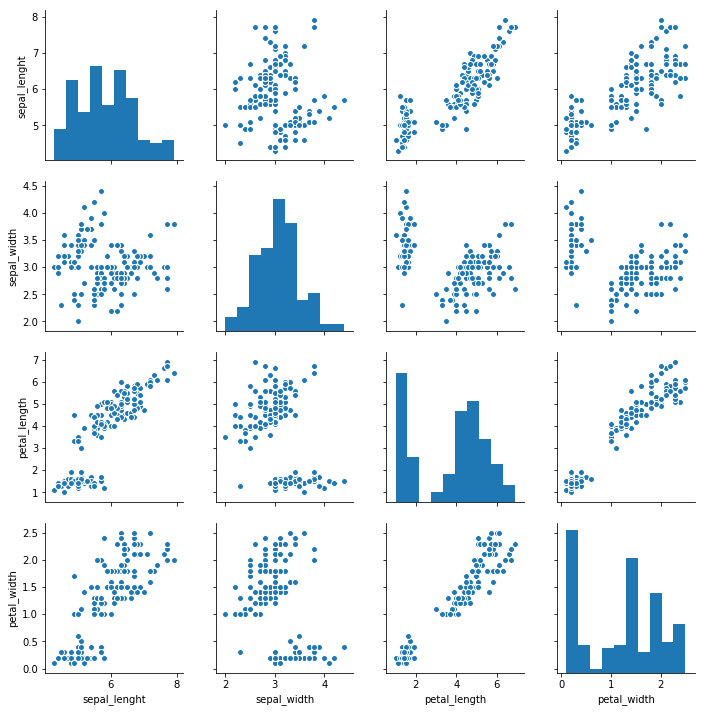

In [32]:
sns.pairplot(pdiris)
plt.show()

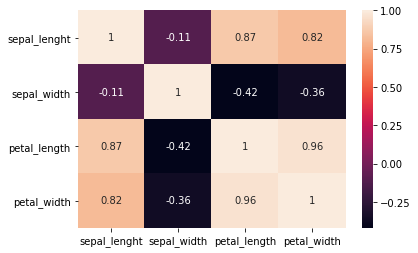

In [33]:
sns.heatmap(pdiris.corr(),annot=True)
plt.show()

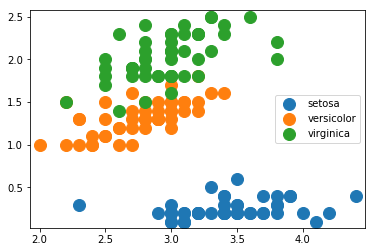

In [38]:
groups=pdiris.groupby(['target'])
fig, ax=plt.subplots()
ax.margins(.03)
for target, group in groups:
    ax.plot(group.sepal_width, group.petal_width,marker='o',linestyle='',ms=12,label=target);
ax.legend()
plt.show()

In [41]:
print(pdiris.groupby(['target']).corr())

                         petal_length  petal_width  sepal_lenght  sepal_width
target                                                                       
setosa     petal_length      1.000000     0.306308      0.263874     0.176695
           petal_width       0.306308     1.000000      0.279092     0.279973
           sepal_lenght      0.263874     0.279092      1.000000     0.746780
           sepal_width       0.176695     0.279973      0.746780     1.000000
versicolor petal_length      1.000000     0.786668      0.754049     0.560522
           petal_width       0.786668     1.000000      0.546461     0.663999
           sepal_lenght      0.754049     0.546461      1.000000     0.525911
           sepal_width       0.560522     0.663999      0.525911     1.000000
virginica  petal_length      1.000000     0.322108      0.864225     0.401045
           petal_width       0.322108     1.000000      0.281108     0.537728
           sepal_lenght      0.864225     0.281108      1.000000

## train model

In [42]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(pdiris[['sepal_lenght','sepal_width','petal_length','petal_width']],pdtarget['species'],test_size=.3, random_state=123)

In [47]:
model=SVC()
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
print(model.score(x_test,y_test))

0.9777777777777777
0.9777777777777777


In [52]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]


In [53]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        18
 versicolor       0.91      1.00      0.95        10
  virginica       1.00      0.94      0.97        17

avg / total       0.98      0.98      0.98        45



## now we do grid search

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
params={'kernel':['rbf','sigmoid','poly','linear'],'C':[.1,.5,1,10],'degree':[2,3,4]}

In [56]:
estimator=SVC()

In [57]:
optimizer=GridSearchCV(estimator,params, cv=10)

In [58]:
optimizer.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1, 10], 'degree': [2, 3, 4], 'kernel': ['rbf', 'sigmoid', 'poly', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
y_pred2=optimizer.best_estimator_.predict(x_test)
accuracy2=accuracy_score(y_pred2,y_test)
print(accuracy2)

0.9777777777777777


In [60]:
print('best result %f using %s' % (optimizer.best_score_,optimizer.best_params_))

best result 0.990476 using {'C': 10, 'degree': 2, 'kernel': 'poly'}


In [64]:
means=optimizer.cv_results_['mean_test_score']
stdvs=optimizer.cv_results_['std_test_score']
params=optimizer.cv_resuts_['params']
for mean,std,para in zip(means,stdvs,params):
    print('%f (%f) with %s' % (mean,std,para))

AttributeError: 'GridSearchCV' object has no attribute 'cv_resuts_'